In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import regex
import scipy.stats as stats
import scipy.optimize as optimize
import scipy.signal as signal
from scipy import cluster
from Bio import SeqIO
from Bio.Seq import Seq, MutableSeq 
from Bio.SeqUtils import GC  
import random
from SCvariables import *
%matplotlib inline

sns.set_style('white')
plt.rcParams['xtick.labelsize']=15
plt.rcParams['ytick.labelsize']=15

In [2]:
genome_folder = './data/scer/'
genomefasta = {}
for i in range(1,10):
    x = loading_fasta_gbk(genome_folder + 'chr0{}.fsa'.format(i),'fasta')
    genomefasta[x.name] = x
for i in range(10,17):
    x = loading_fasta_gbk(genome_folder + 'chr{}.fsa'.format(i),'fasta')
    genomefasta[x.name] = x

chr_lengths = pd.read_csv(genome_folder + 'scer.genome',sep = '\t',header=None)
chr_lengths.columns = ['chromosome','length']

yeastgenome = {}
chroms = ['I','II','III','IV','V','VI','VII','VIII','IX','X','XI','XII','XIII','XIV','XV','XVI']
for i in range(1,10):
    x = loading_fasta_gbk(genome_folder + 'chr0{}.gb'.format(i),'genbank')
    yeastgenome['chr'+chroms[i-1]] = reading_gbk_new(x,['CDS','tRNA','rRNA','ncRNA'])
for i in range(10,17):
    x = loading_fasta_gbk(genome_folder + 'chr{}.gb'.format(i),'genbank')
    yeastgenome['chr'+chroms[i-1]] = reading_gbk_new(x,['CDS','tRNA','rRNA','ncRNA'])


##yeastgenome representation puts a 1 where there is a gene
yeastgenome_gene_representation = {}
for key, val in iter(yeastgenome.items()):
    x = np.zeros([1,len(genomefasta[key].seq)])
    for genes in [val]:
        for i in range (0, len(genes.annotation)):
            if genes.strand[i]== +1:
                for j in range(0, genes.length[i]-1):
                    x[0][genes.start[i]+j]=10
            else:
                for j in range(0,genes.length[i]-1):
                    x[0][genes.end[i]+j]=-10
    yeastgenome_gene_representation[key] = x
    
#convert into a pandas...
genomedict = {}
chroms = ['I','II','III','IV','V','VI','VII','VIII','IX','X','XI','XII','XIII','XIV','XV','XVI']
for c in chroms:
    chrom = 'chr'+c
    name,start,end,strand=[],[],[],[]
    for j in range(len(yeastgenome[chrom].start)):
        name.append(yeastgenome[chrom].name[j])
        start.append(yeastgenome[chrom].start[j])
        end.append(yeastgenome[chrom].end[j])
        strand.append(yeastgenome[chrom].strand[j])
    genomedict[chrom] = pd.DataFrame([name,start,end,strand],['name','start','end','strand']).transpose()
    
#calculate AT content
sliding_100 = {}
for key, val in iter(genomefasta.items()):
    sliding_100[key] = sliding_window(val,100)[0]
    
genomedict = formatGenomeDict(genomedict,genomefasta)

catyeastgenome = genomefasta['chrI'].seq
for chrom in chroms[1:]:
    catyeastgenome = catyeastgenome + genomefasta['chr'+chrom].seq

In [3]:
#pullout ARS sequences from genbank
yeastCEN = {}
chroms = ['I','II','III','IV','V','VI','VII','VIII','IX','X','XI','XII','XIII','XIV','XV','XVI']
for i in range(1,10):
    x = loading_fasta_gbk(genome_folder + 'chr0{}.gb'.format(i),'genbank')
    yeastCEN['chr'+chroms[i-1]] = extract_CEN(x,['centromere'])
for i in range(10,17):
    x = loading_fasta_gbk(genome_folder + 'chr{}.gb'.format(i),'genbank')
    yeastCEN['chr'+chroms[i-1]] = extract_CEN(x,['centromere'])
    
periCEN = pd.read_csv('./data/pericentromere.txt',index_col=0)

In [4]:
RNAseq = loadyeastRNAseqData() #raff data
RNAseqaF = loadyeastRNAseqaFData() #aF arrest data
RNAseqgly = loadyeastGlyRNAseqData() #glycerol data
RNAseq_RPKM = pd.read_csv('./data/RNAseq_rpkm_merged.txt',sep=',')

downloading GSM5001907_D20-252008_nodup_plus_all.txt.gz from GEO
unzipping GSM5001907_D20-252008_nodup_plus_all.txt.gz


/home/msguo/.local/lib/python3.6/site-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


downloading GSM5001907_D20-252008_nodup_minus_all.txt.gz from GEO
unzipping GSM5001907_D20-252008_nodup_minus_all.txt.gz
downloading GSM5001909_D20-252007_nodup_plus_all.txt.gz from GEO
unzipping GSM5001909_D20-252007_nodup_plus_all.txt.gz
downloading GSM5001909_D20-252007_nodup_minus_all.txt.gz from GEO
unzipping GSM5001909_D20-252007_nodup_minus_all.txt.gz
downloading GSM5001911_D20-3448_plus_all.txt.gz from GEO
unzipping GSM5001911_D20-3448_plus_all.txt.gz
downloading GSM5001911_D20-3448_minus_all.txt.gz from GEO
unzipping GSM5001911_D20-3448_minus_all.txt.gz


In [5]:
GapR_raff = loadraffChIP()
GapR_raffneg = loadraffnegChIP()
chip_fold = loadChIPFold(GapR_raff, GapR_raffneg)

downloading GSM5001899_D20-5952_all_nodup.txt.gz from GEO
unzipping GSM5001899_D20-5952_all_nodup.txt.gz
downloading GSM5001905_D20-261001_all_nodup.txt.gz from GEO
unzipping GSM5001905_D20-261001_all_nodup.txt.gz


In [6]:
GapR_raffaF = loadraffaFChIP()
GapR_raffnegaF = loadaFnegChIP()
chip_foldaF = loadChIPFold(GapR_raffaF, GapR_raffnegaF)

downloading GSM5001901_D20-5954_all_nodup.txt.gz from GEO
unzipping GSM5001901_D20-5954_all_nodup.txt.gz
downloading GSM5001906_D20-261002_all_nodup.txt.gz from GEO
unzipping GSM5001906_D20-261002_all_nodup.txt.gz


In [7]:
GapR_gly = loadglyChIP()
GapR_neggly = loadglynegChIP()
chip_foldgly = loadChIPFold(GapR_gly, GapR_neggly)

downloading GSM4628318_D19_5482_all.txt.gz from GEO
unzipping GSM4628318_D19_5482_all.txt.gz
downloading GSM4628316_D19_5480_all.txt.gz from GEO
unzipping GSM4628316_D19_5480_all.txt.gz


In [8]:
#Psoralen Data in Glucose -- generated from bedgraph files from GSM3141352
psoralenG128 = pd.read_csv('./data/GSM3141352_WT_Supercoil_G128_all_nodup.txt',sep = ',', index_col=0) #bTMP/IP

In [9]:
#Scc1 ChIP with tension -- generated from bedgraph files from GSM3668254
Scc1_tension = pd.read_csv('./data/GSM3668254_Scc1-WT_Tension.calibrated.txt',sep=',',index_col=0)

### Fig. 6A

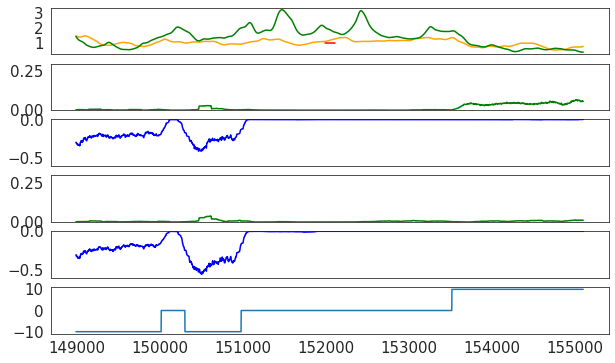

In [10]:
chrom = 'chrV'
start = int(yeastCEN[chrom].start[0]) - 3000
end = int(yeastCEN[chrom].end[0]+3000)

fig, axes = plt.subplots(nrows=6, ncols=1, figsize=(10,6), sharey=False)
axes[0].plot(np.arange(start, end),chip_fold[chip_fold.chr==chrom].fold_nolog[start:end], 'orange')
axes[0].plot(np.arange(start, end),chip_foldaF[chip_foldaF.chr==chrom].fold_nolog[start:end], 'green')
axes[0].plot([start+3000,end-3000],[1,1],'red')

axes[1].plot(np.arange(start, end),(RNAseq[RNAseq.chr==chrom].fwd[start:end]),'green')
axes[2].plot(np.arange(start, end),-(RNAseq[RNAseq.chr==chrom].rev[start:end]),'blue')

axes[1].set_ylim([0,0.3])
axes[2].set_ylim([-0.6,0])

axes[3].plot(np.arange(start, end),(RNAseqaF[RNAseqaF.chr==chrom].fwd[start:end]),'green')
axes[4].plot(np.arange(start, end),-(RNAseqaF[RNAseqaF.chr==chrom].rev[start:end]),'blue')

axes[3].set_ylim([0,0.3])
axes[4].set_ylim([-0.6,0])

axes[0].get_xaxis().set_visible(False)
axes[1].get_xaxis().set_visible(False)
axes[2].get_xaxis().set_visible(False)
axes[3].get_xaxis().set_visible(False)
axes[4].get_xaxis().set_visible(False)

axes[5].plot(np.arange(start, end), yeastgenome_gene_representation[chrom][0,start:end])

### Fig. 6B

In [11]:
RNAseq_RPKM['real_start']=RNAseq_RPKM[['fullstart','fullend']].min(axis=1)
RNAseq_RPKM['real_end']=RNAseq_RPKM[['fullstart','fullend']].max(axis=1)
RNAseq_RPKM['geneL'] = RNAseq_RPKM.apply(lambda r:r['real_end']-r['real_start'],axis=1)

In [12]:
#remove ty element genes from RNAseq list for this analysis: 

#import and parse list of ty elements
ty_list = pd.read_csv('./data/Scer3_ty.txt',sep = ' ',header=None)
ty_list.columns = ['names',1,2,3,4,'strand']
ty_list['chr'] = 'chr'+ty_list[3]
a = []
[a.append(int(str.split(i,'..')[0])) for i in ty_list[4].values]
ty_list['start'] = a
a = []
[a.append(int(str.split(i,'..')[1])) for i in ty_list[4].values]
ty_list['end'] = a
ty_list.drop(columns=[1,2,3,4],inplace=True)

#Drop YCLWTy5-1 b/c too close to chr end
ty_list.drop(19,inplace=True)

#ty start always on LEFT of ty end
noTY_RNAseq = RNAseq_RPKM.copy()

for i, val in ty_list.iterrows():
    x = RNAseq_RPKM[(RNAseq_RPKM.chr==val.chr) & (val.start < RNAseq_RPKM.start) & (val.end > RNAseq_RPKM.end)]
    drop_ty = x.index
    noTY_RNAseq = noTY_RNAseq.iloc[~noTY_RNAseq.index.isin(drop_ty.values)]

In [13]:
high_exp = noTY_RNAseq[['name','strand','chr','real_start','real_end','geneL','gal']]

df_regions = pd.concat([high_exp,high_exp.shift(-1)],axis=1,keys=['left','right'],names=['gene'])
df_regions.columns = ['{}_{}'.format(x,y) for x,y in df_regions.columns]
df_regions = df_regions.dropna(subset=['right_real_start'])
df_regions=df_regions.loc[df_regions['left_chr']==df_regions['right_chr']] #makes sure they're in the same chromosome!
df_regions.loc[df_regions['left_strand']==df_regions['right_strand'],'intergenic_type']='same'
df_regions.loc[(df_regions['left_strand']==1) & (df_regions['right_strand']==-1),'intergenic_type']='conv'
df_regions.loc[(df_regions['left_strand']==-1) & (df_regions['right_strand']==1),'intergenic_type']='div'

In [14]:
df_regions['intergenic_mean_gapR']=df_regions.apply(lambda r:chip_fold.fold_nolog.loc[r['left_real_end']:r['right_real_start']].mean(),axis=1)
df_regions['intergenic_mean_gapRaF']=df_regions.apply(lambda r:chip_foldaF.fold_nolog.loc[r['left_real_end']:r['right_real_start']].mean(),axis=1)
df_regions['intergenic_mean_gapRgly']=df_regions.apply(lambda r:chip_foldgly.fold_nolog.loc[r['left_real_end']:r['right_real_start']].mean(),axis=1)
df_regions['intergenic_length']=df_regions.apply(lambda r:r['right_real_start']-r['left_real_end'],axis=1)
df_final = df_regions[df_regions.intergenic_length >0]

In [15]:
CEN_df = pd.DataFrame([yeastCEN['chrI'].name[0],yeastCEN['chrI'].annotation[0],yeastCEN['chrI'].start[0],yeastCEN['chrI'].end[0],yeastCEN['chrI'].strand[0]]).transpose()
CEN_df.columns = ['name','descrip','start','end','strand']
CEN_df['chr'] = 'chrI'
for c in ['II','III','IV','V','VI','VII','VIII','IX','X','XI','XII','XIII','XIV','XV','XVI']:
    chrom = 'chr'+c
    x = pd.DataFrame([yeastCEN[chrom].name[0],yeastCEN[chrom].annotation[0],yeastCEN[chrom].start[0],yeastCEN[chrom].end[0],yeastCEN[chrom].strand[0]]).transpose()
    x.columns = ['name','descrip','start','end','strand']
    x['chr'] = chrom
    CEN_df = CEN_df.append(x)
CEN_df = CEN_df.reset_index().drop(columns='index')

In [16]:
fullstart = []
fullend = []
for i,value in CEN_df.iterrows():
    chrom = value.chr
    fullstart.append(np.min([value.start+la[chrom],value.end+la[chrom]]))
    fullend.append(np.max([value.start+la[chrom],value.end+la[chrom]]))
        
CEN_df['fullstart'] = fullstart
CEN_df['fullend'] = fullend

CEN_df['CEN_mean_gapR_raff']=CEN_df.apply(lambda r:chip_fold.fold_nolog.loc[r['fullstart']:r['fullend']].mean(),axis=1)
CEN_df['CEN_mean_gapR_aF']=CEN_df.apply(lambda r:chip_foldaF.fold_nolog.loc[r['fullstart']:r['fullend']].mean(),axis=1)
CEN_df['CEN_mean_gapR_gly']=CEN_df.apply(lambda r:chip_foldgly.fold_nolog.loc[r['fullstart']:r['fullend']].mean(),axis=1)

Ttest_indResult(statistic=1.2719226175322638, pvalue=0.20344845908290748)
Ttest_indResult(statistic=10.976951354912819, pvalue=8.892059699669603e-28)
Ttest_indResult(statistic=6.967344958858799, pvalue=3.5647420640910884e-12)


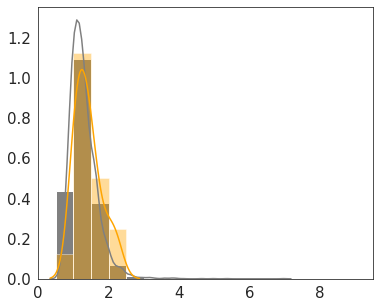

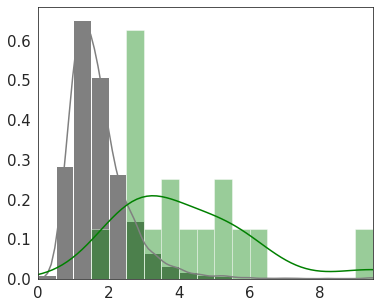

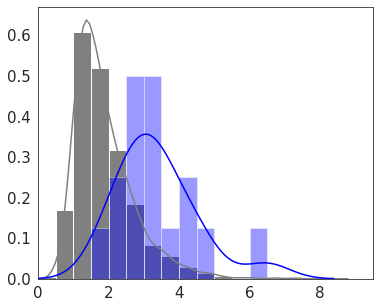

In [17]:
bins = np.arange(0,10,0.5)

plt.figure(figsize=(6,5))
sns.distplot(np.clip(np.array(df_final.intergenic_mean_gapR),bins[0],bins[-1]),bins=bins, color= 'grey',hist_kws={'alpha':1.0})
sns.distplot(np.clip(np.array(CEN_df.CEN_mean_gapR_raff),bins[0],bins[-1]),bins=bins,color='orange')
plt.xlim([0,bins[-1]])
print(stats.ttest_ind(CEN_df.CEN_mean_gapR_raff,df_final.intergenic_mean_gapR))

plt.figure(figsize=(6,5))
sns.distplot(np.clip(np.array(df_final.intergenic_mean_gapRaF),bins[0],bins[-1]),bins=bins, color= 'grey',hist_kws={'alpha':1.0})
sns.distplot(np.clip(np.array(CEN_df.CEN_mean_gapR_aF),bins[0],bins[-1]),bins=bins,color='green')
plt.xlim([0,bins[-1]])
print(stats.ttest_ind(CEN_df.CEN_mean_gapR_aF,df_final.intergenic_mean_gapRaF))

plt.figure(figsize=(6,5))
sns.distplot(np.clip(np.array(df_final.intergenic_mean_gapRgly),bins[0],bins[-1]),bins=bins, color= 'grey',hist_kws={'alpha':1.0})
sns.distplot(np.clip(np.array(CEN_df.CEN_mean_gapR_gly),bins[0],bins[-1]),bins=bins,color='blue')
plt.xlim([0,bins[-1]])
print(stats.ttest_ind(CEN_df.CEN_mean_gapR_gly,df_final.intergenic_mean_gapRgly))

### Fig. 6C and supplemental 1B

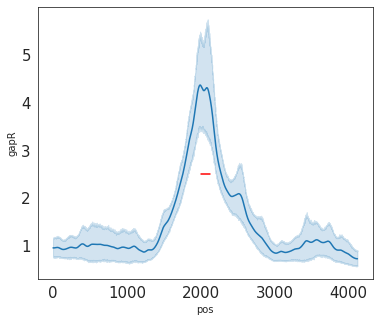

In [18]:
#for aF
gapR_CEN_neighboring = []
for i,value in CEN_df.iterrows():
    if value.strand == 1:
        l = value.fullstart-2000
        r = value.fullstart+2120
        gapR_CEN_neighboring.append(chip_foldaF[l:r].fold_nolog.values)
    elif value.strand == -1:
        l = value.fullend-2120
        r = value.fullend+2000
        gapR_CEN_neighboring.append(chip_foldaF[l:r].fold_nolog.values[::-1])        

gx = np.asarray(gapR_CEN_neighboring)
gz = np.mean(gx, axis = 0)
gs = np.std(gx, axis = 0)

GapR_CEN_matrix = pd.DataFrame([gx[0],np.arange(len(gx[0]))],['gapR','pos']).transpose()
GapR_CEN_matrix['rep'] = 0
for i in range(1,len(gx)):
    t = pd.DataFrame([gx[i],np.arange(len(gx[0]))],['gapR','pos']).transpose()
    t['rep']=i
    GapR_CEN_matrix = GapR_CEN_matrix.append(t)
    
plt.figure(figsize=(6,5))
sns.lineplot(x="pos", y="gapR", data=GapR_CEN_matrix, ci=95)
plt.plot([2000,2120],[2.5,2.5],'r')

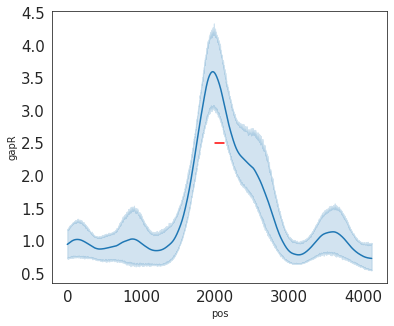

In [19]:
#for glycerol
gapR_CEN_neighboring = []
for i,value in CEN_df.iterrows():
    if value.strand == 1:
        l = value.fullstart-2000
        r = value.fullstart+2120
        gapR_CEN_neighboring.append(chip_foldgly[l:r].fold_nolog.values)
    elif value.strand == -1:
        l = value.fullend-2120
        r = value.fullend+2000
        gapR_CEN_neighboring.append(chip_foldgly[l:r].fold_nolog.values[::-1])        

gx = np.asarray(gapR_CEN_neighboring)
gz = np.mean(gx, axis = 0)
gs = np.std(gx, axis = 0)

GapR_CEN_matrix = pd.DataFrame([gx[0],np.arange(len(gx[0]))],['gapR','pos']).transpose()
GapR_CEN_matrix['rep'] = 0
for i in range(1,len(gx)):
    t = pd.DataFrame([gx[i],np.arange(len(gx[0]))],['gapR','pos']).transpose()
    t['rep']=i
    GapR_CEN_matrix = GapR_CEN_matrix.append(t)
    
plt.figure(figsize=(6,5))
sns.lineplot(x="pos", y="gapR", data=GapR_CEN_matrix, ci=95)
plt.plot([2000,2120],[2.5,2.5],'r')

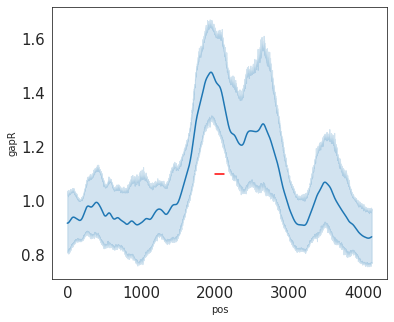

In [20]:
#Figure 6 - supplemental figure 1B
gapR_CEN_neighboring = []
for i,value in CEN_df.iterrows():
    if value.strand == 1:
        l = value.fullstart-2000
        r = value.fullstart+2120
        gapR_CEN_neighboring.append(chip_fold[l:r].fold_nolog.values)
    elif value.strand == -1:
        l = value.fullend-2120
        r = value.fullend+2000
        gapR_CEN_neighboring.append(chip_fold[l:r].fold_nolog.values[::-1])        

gx = np.asarray(gapR_CEN_neighboring)
gz = np.mean(gx, axis = 0)
gs = np.std(gx, axis = 0)

GapR_CEN_matrix = pd.DataFrame([gx[0],np.arange(len(gx[0]))],['gapR','pos']).transpose()
GapR_CEN_matrix['rep'] = 0
for i in range(1,len(gx)):
    t = pd.DataFrame([gx[i],np.arange(len(gx[0]))],['gapR','pos']).transpose()
    t['rep']=i
    GapR_CEN_matrix = GapR_CEN_matrix.append(t)
    
plt.figure(figsize=(6,5))
sns.lineplot(x="pos", y="gapR", data=GapR_CEN_matrix, ci=95)
plt.plot([2000,2120],[1.1,1.1],'r')

### Fig. 6D

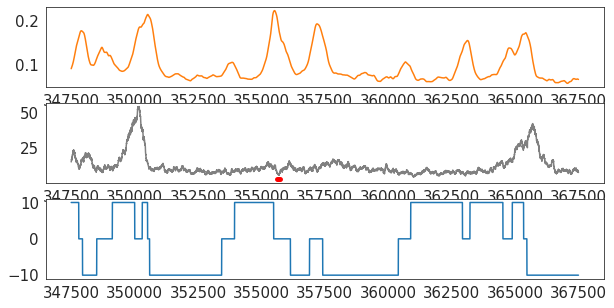

In [21]:
chrom = 'chrIX'
lpos = 347500
rpos = 367500

f, ax = plt.subplots(nrows=3,ncols=1, figsize = (10,5))
ax[0].plot(np.arange(lpos,rpos),GapR_raff[GapR_raff.chr==chrom][lpos:rpos].smooth.values,'C1')

ax[1].plot(np.arange(lpos,rpos),Scc1_tension[Scc1_tension.chr==chrom][lpos:rpos].value.values,'grey')
ax[1].plot([CEN_df[CEN_df.chr==chrom].start.values[0],CEN_df[CEN_df.chr==chrom].end.values[0]],[3,3],color='red',linewidth=5)
ax[2].plot(np.arange(lpos,rpos),yeastgenome_gene_representation[chrom][0,lpos:rpos])

### Fig. 6E

In [22]:
top5pctScc = enrichedRegions(Scc1_tension.value,21)

out = []
regions = top5pctScc
m = np.mean(Scc1_tension.value)
s = np.std(Scc1_tension.value)
chip_diff = Scc1_tension.value

for i in range(len(regions)):
    z = regions[i]
    c = chip_diff.loc[z[0]-5000:z[1]+5000]
    c_diff = c[c>(m+1/3*s)] #this is mean + 1/3 std
    j = z[1]
    start = z[0]
    end = z[1]
    while j < z[1]+5000:
        try:
            c_diff[j+1]
            j +=1
        except:
            end = j
            j = z[1]+5000
    j = z[0]
    while j > z[0]-5000:
        try:
            c_diff[j-1]
            j -=1
        except:
            start = j
            j = z[0]-5000
    if start > end:
        print('problem!')
    out.append(tuple([start,end]))
print(len(out))
regions = sorted(list(set(out)))

out = []
i = 1
z = regions[0]
start = z[0]
end = z[1]
while i < len(regions):
    if regions[i][0] <= regions[i-1][1] + 10: #merge within 10 bp
        end = regions[i][1]
        i += 1
    else:
        out.append([start,end])
        i += 1
        z = regions[i-1]
        start = z[0]
        end = z[1]
out.append([start,end])
print(len(out))
Scc1_peaks = out

#check if any GapR_peaks are close to chr ends, exclude them
lengths = []
for i in la.items():
    lengths.append(i[1])
    
Scc1_checked = []
for i in Scc1_peaks:
    start = np.min(i)
    end = np.max(i)
    append = True
    if start - 1000 <= 0:
        append=False
    else:
        for j in lengths:
            if abs(start - j) <= 1000:
                append=False
            if abs(end - j) <= 1000:
                append=False
#                print(i)
    if append == True:
        Scc1_checked.append(i)   
        
Scc1_checked = pd.DataFrame(Scc1_checked)
Scc1_checked.columns = ['start','end']
len(Scc1_checked[Scc1_checked.end-Scc1_checked.start > 50])

3066
533


521

In [23]:
SccTEnrich = []
GapEnrich2 = []
GapEnrichaF = []
GapEnrichgly = []
SccTEnrich2 = []
GapRMax = []
ind = []
N = 2000
for i, j in Scc1_checked[Scc1_checked.end-Scc1_checked.start > 50].iterrows():
    midpt = j.start+Scc1_tension[j.start:j.end].value.argmax()
    GapRMax.append(chip_foldgly[midpt-200:midpt+200].fold_nolog.max())
    GapEnrich2.append(chip_fold[midpt-N:midpt+N].fold_nolog.values)
    GapEnrichaF.append(chip_foldaF[midpt-N:midpt+N].fold_nolog.values)
    GapEnrichgly.append(chip_foldgly[midpt-N:midpt+N].fold_nolog.values)
    SccTEnrich2.append(Scc1_tension[midpt-N:midpt+N].value.values)
    SccTEnrich.append(Scc1_tension[j.start:j.end].value.max())
    ind.append(i)
    
binSize = 10
out = []
out2 = []
out3 = []
out4 = []
for j in range(len(GapEnrich2)):
    a,b,c,d = [],[],[],[]
    for i in range(0,2*N,binSize):
        a.append(np.mean(GapEnrich2[j][i:i+binSize]))
        b.append(np.mean(SccTEnrich2[j][i:i+binSize]))
        c.append(np.mean(GapEnrichaF[j][i:i+binSize]))
        d.append(np.mean(GapEnrichgly[j][i:i+binSize]))
    out.append(a)
    out2.append(b)
    out3.append(c)
    out4.append(d)

newMat = pd.DataFrame([SccTEnrich,out,ind,out2,out3,out4,GapRMax],['avScc','GapR_thrends','orig_ind','SccT','GapR_aF','GapR_gly','raff_max']).transpose()
newMat.sort_values('avScc',ascending=False,inplace=True)

sortedGapREnrich = []
sortedGapREnrichaF = []
sortedGapREnrichgly = []
sortedSccT = []
for i,j in newMat.iterrows():
    sortedGapREnrich.append(j.GapR_thrends)
    sortedSccT.append(j.SccT)
    sortedGapREnrichaF.append(j.GapR_aF)
    sortedGapREnrichgly.append(j.GapR_gly)

/home/msguo/.local/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/msguo/.local/lib/python3.6/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


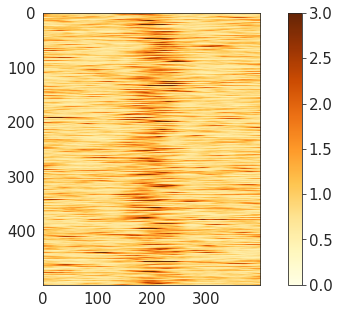

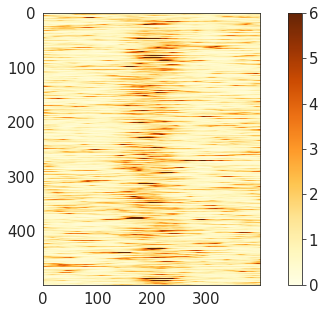

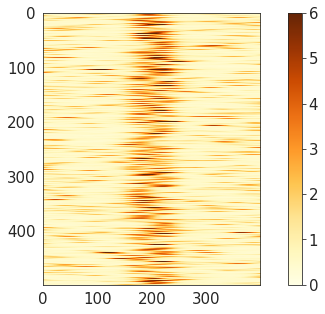

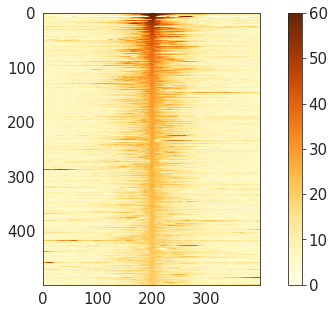

In [24]:
plt.figure(figsize = [10,5])
plt.imshow(sortedGapREnrich[0:500],vmin=0,vmax=3, cmap='YlOrBr')
plt.colorbar()

plt.figure(figsize = [10,5])
plt.imshow(sortedGapREnrichaF[0:500],vmin=0,vmax=6, cmap='YlOrBr')
plt.colorbar()

plt.figure(figsize = [10,5])
plt.imshow(sortedGapREnrichgly[0:500],vmin=0,vmax=6, cmap='YlOrBr')
plt.colorbar()

plt.figure(figsize = [10,5])
plt.imshow(sortedSccT[0:500], vmax = 60, cmap='YlOrBr')
plt.colorbar()

### Fig. 6 - supplemental figure 1A

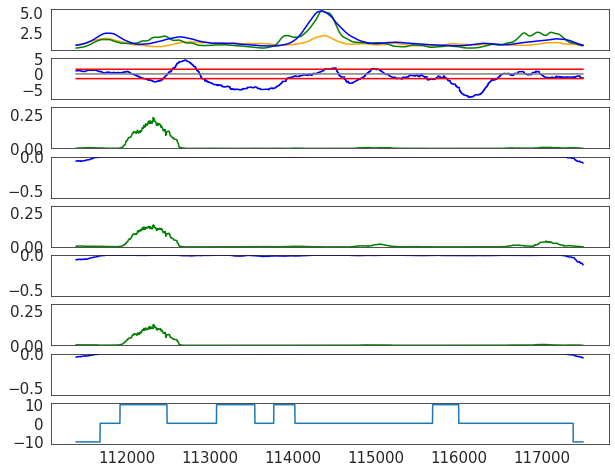

In [25]:
chrom = 'chrIII'
start = int(yeastCEN[chrom].start[0]) - 3000
end = int(yeastCEN[chrom].end[0]+3000)

fig, axes = plt.subplots(nrows=9, ncols=1, figsize=(10,8), sharey=False)
axes[0].plot(np.arange(start, end),chip_fold[chip_fold.chr==chrom].fold_nolog[start:end], 'orange')
axes[0].plot(np.arange(start, end),chip_foldaF[chip_foldaF.chr==chrom].fold_nolog[start:end], 'green')
axes[0].plot(np.arange(start, end),chip_foldgly[chip_foldgly.chr==chrom].fold_nolog[start:end], 'blue')

axes[1].plot(np.arange(start, end),psoralenG128[psoralenG128.chr==chrom]['value'][start:end], 'blue')
axes[1].plot(np.arange(start, end),np.arange(start,end)*0, 'grey')
axes[1].plot(np.arange(start, end),np.arange(start,end)*0+1.5, 'r')
axes[1].plot(np.arange(start, end),np.arange(start,end)*0-1.5, 'r')

axes[2].plot(np.arange(start, end),(RNAseq[RNAseq.chr==chrom].fwd[start:end]),'green')
axes[3].plot(np.arange(start, end),-(RNAseq[RNAseq.chr==chrom].rev[start:end]),'blue')

axes[2].set_ylim([0,0.3])
axes[3].set_ylim([-0.6,0])

axes[4].plot(np.arange(start, end),(RNAseqaF[RNAseqaF.chr==chrom].fwd[start:end]),'green')
axes[5].plot(np.arange(start, end),-(RNAseqaF[RNAseqaF.chr==chrom].rev[start:end]),'blue')

axes[4].set_ylim([0,0.3])
axes[5].set_ylim([-0.6,0])

axes[6].plot(np.arange(start, end),(RNAseqgly[RNAseqgly.chr==chrom].fwd[start:end]),'green')
axes[7].plot(np.arange(start, end),-(RNAseqgly[RNAseqgly.chr==chrom].rev[start:end]),'blue')

axes[6].set_ylim([0,0.3])
axes[7].set_ylim([-0.6,0])


axes[0].get_xaxis().set_visible(False)
axes[1].get_xaxis().set_visible(False)
axes[2].get_xaxis().set_visible(False)
axes[3].get_xaxis().set_visible(False)
axes[4].get_xaxis().set_visible(False)
axes[5].get_xaxis().set_visible(False)
axes[6].get_xaxis().set_visible(False)
axes[7].get_xaxis().set_visible(False)

axes[8].plot(np.arange(start, end), yeastgenome_gene_representation[chrom][0,start:end])

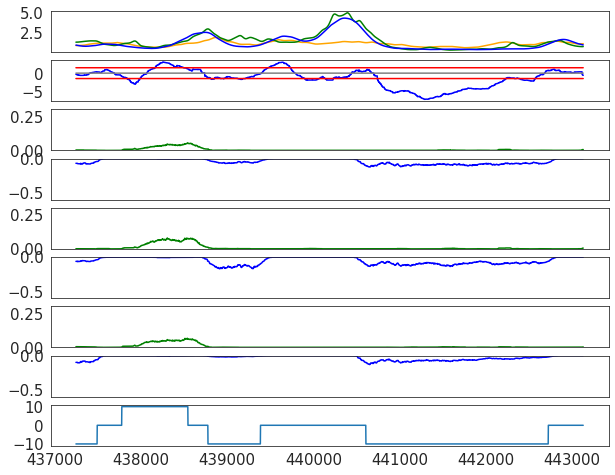

In [26]:
chrom = 'chrXI'
start = int(yeastCEN[chrom].start[0]) - 3000
end = int(yeastCEN[chrom].end[0]+3000)

fig, axes = plt.subplots(nrows=9, ncols=1, figsize=(10,8), sharey=False)
axes[0].plot(np.arange(start, end),chip_fold[chip_fold.chr==chrom].fold_nolog[start:end], 'orange')
axes[0].plot(np.arange(start, end),chip_foldaF[chip_foldaF.chr==chrom].fold_nolog[start:end], 'green')
axes[0].plot(np.arange(start, end),chip_foldgly[chip_foldgly.chr==chrom].fold_nolog[start:end], 'blue')

axes[1].plot(np.arange(start, end),psoralenG128[psoralenG128.chr==chrom]['value'][start:end], 'blue')
axes[1].plot(np.arange(start, end),np.arange(start,end)*0, 'grey')
axes[1].plot(np.arange(start, end),np.arange(start,end)*0+1.5, 'r')
axes[1].plot(np.arange(start, end),np.arange(start,end)*0-1.5, 'r')

axes[2].plot(np.arange(start, end),(RNAseq[RNAseq.chr==chrom].fwd[start:end]),'green')
axes[3].plot(np.arange(start, end),-(RNAseq[RNAseq.chr==chrom].rev[start:end]),'blue')

axes[2].set_ylim([0,0.3])
axes[3].set_ylim([-0.6,0])

axes[4].plot(np.arange(start, end),(RNAseqaF[RNAseqaF.chr==chrom].fwd[start:end]),'green')
axes[5].plot(np.arange(start, end),-(RNAseqaF[RNAseqaF.chr==chrom].rev[start:end]),'blue')

axes[4].set_ylim([0,0.3])
axes[5].set_ylim([-0.6,0])

axes[6].plot(np.arange(start, end),(RNAseqgly[RNAseqgly.chr==chrom].fwd[start:end]),'green')
axes[7].plot(np.arange(start, end),-(RNAseqgly[RNAseqgly.chr==chrom].rev[start:end]),'blue')

axes[6].set_ylim([0,0.3])
axes[7].set_ylim([-0.6,0])


axes[0].get_xaxis().set_visible(False)
axes[1].get_xaxis().set_visible(False)
axes[2].get_xaxis().set_visible(False)
axes[3].get_xaxis().set_visible(False)
axes[4].get_xaxis().set_visible(False)
axes[5].get_xaxis().set_visible(False)
axes[6].get_xaxis().set_visible(False)
axes[7].get_xaxis().set_visible(False)

axes[8].plot(np.arange(start, end), yeastgenome_gene_representation[chrom][0,start:end])

### Fig. 6 - supplemental figure 1C

In [27]:
RNAseq_RPKM['real_start']=RNAseq_RPKM[['fullstart','fullend']].min(axis=1)
RNAseq_RPKM['real_end']=RNAseq_RPKM[['fullstart','fullend']].max(axis=1)
RNAseq_RPKM['geneL'] = RNAseq_RPKM.apply(lambda r:r['real_end']-r['real_start'],axis=1)

In [28]:
high_exp = RNAseq_RPKM[['name','strand','chr','real_start','real_end','geneL','gal']]

left1 = RNAseq_RPKM[RNAseq_RPKM.name.isin(periCEN.left_left.values)]
left2 = RNAseq_RPKM[RNAseq_RPKM.name.isin(periCEN.right_left.values)]
left = left1.append(left2)
right = pd.DataFrame()
for i in np.concatenate((periCEN.left_right.values,periCEN.right_right.values),axis=0):
    right = right.append(high_exp[high_exp.name == i])
    
left['merging'] = np.arange(len(left))
right['merging'] = np.arange(len(right))
test = pd.merge(left,right,on='merging')

In [29]:
n = 0
test['intergenic_mean_gapR']=test.apply(lambda r:chip_fold.fold_nolog.loc[r['real_end_x']-n:r['real_start_y']+n].mean(),axis=1)
test['intergenic_mean_gapRaF']=test.apply(lambda r:chip_foldaF.fold_nolog.loc[r['real_end_x']-n:r['real_start_y']+n].mean(),axis=1)
test['intergenic_mean_gapRgly']=test.apply(lambda r:chip_foldgly.fold_nolog.loc[r['real_end_x']-n:r['real_start_y']+n].mean(),axis=1)
test['intergenic_length']=test.apply(lambda r:r['real_end_x']-r['real_start_y'],axis=1)

Ttest_indResult(statistic=6.195779969772849, pvalue=6.172208066590732e-10)
Ttest_indResult(statistic=2.1538233517885277, pvalue=0.03129246599879965)
Ttest_indResult(statistic=8.299171449912537, pvalue=1.2746838350409073e-16)


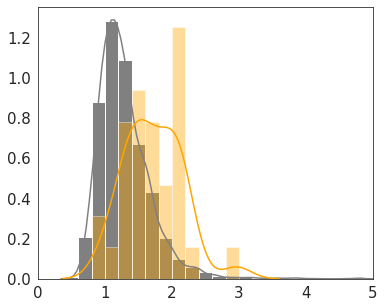

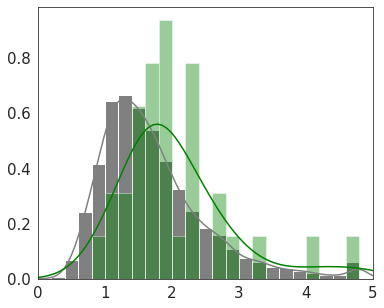

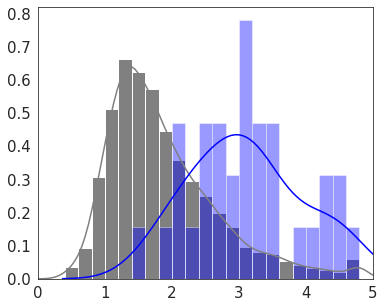

In [30]:
plt.figure(figsize=(6,5))
bins = np.arange(0,5,0.2)
sns.distplot(np.clip(np.array(df_final.intergenic_mean_gapR),bins[0],bins[-1]),bins=bins, color= 'grey',hist_kws={'alpha':1.0})
sns.distplot(np.clip(np.array(test.intergenic_mean_gapR),bins[0],bins[-1]),bins=bins,color='orange')
plt.xlim([0,5])
print(stats.ttest_ind(test.intergenic_mean_gapR,df_final.intergenic_mean_gapR))

plt.figure(figsize=(6,5))
bins = np.arange(0,5,0.2)
sns.distplot(np.clip(np.array(df_final.intergenic_mean_gapRaF),bins[0],bins[-1]),bins=bins, color= 'grey',hist_kws={'alpha':1.0})
sns.distplot(np.clip(np.array(test.intergenic_mean_gapRaF),bins[0],bins[-1]),bins=bins,color='green')
plt.xlim([0,5])
print(stats.ttest_ind(test.intergenic_mean_gapRaF,df_final.intergenic_mean_gapRaF))

plt.figure(figsize=(6,5))
bins = np.arange(0,5,0.2)
sns.distplot(np.clip(np.array(df_final.intergenic_mean_gapRgly),bins[0],bins[-1]),bins=bins, color= 'grey',hist_kws={'alpha':1.0})
sns.distplot(np.clip(np.array(test.intergenic_mean_gapRgly),bins[0],bins[-1]),bins=bins,color='blue')
plt.xlim([0,5])
print(stats.ttest_ind(test.intergenic_mean_gapRgly,df_final.intergenic_mean_gapRgly))

### Fig. 6 - supplemental figure 1D

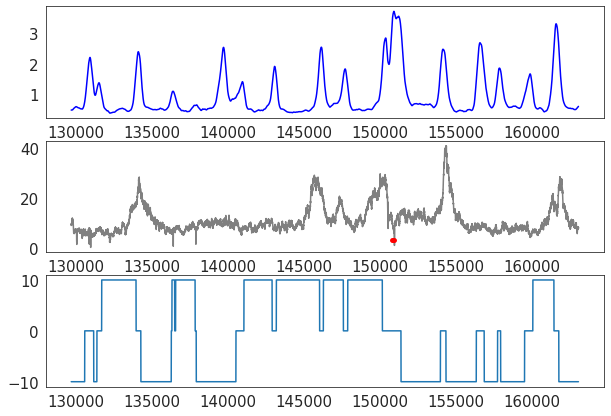

In [31]:
chrom = 'chrXII'
lpos = test[test.chr_x==chrom][0:1].start.values[0]-2000
rpos = test[test.chr_x==chrom][1:].start.values[0]+3000

f, ax = plt.subplots(nrows=3,ncols=1, figsize = (10,7))
ax[0].plot(np.arange(lpos,rpos),chip_foldgly[chip_foldgly.chr==chrom][lpos:rpos].fold_nolog.values,'blue')
ax[1].plot(np.arange(lpos,rpos),Scc1_tension[Scc1_tension.chr==chrom][lpos:rpos].value.values,'grey')
ax[1].plot([CEN_df[CEN_df.chr==chrom].start.values[0],CEN_df[CEN_df.chr==chrom].end.values[0]],[3,3],color='red',linewidth=5)
ax[2].plot(np.arange(lpos,rpos),yeastgenome_gene_representation[chrom][0,lpos:rpos])

### Fig. 6 - supplemental figure 1E

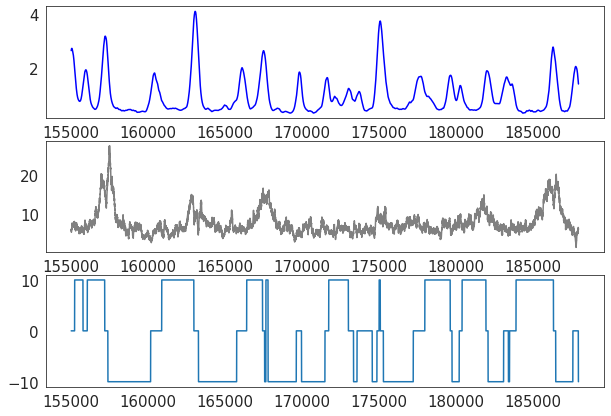

In [32]:
#other non CEN peaks
chrom = 'chrIX' #interesting peaks
lpos = 155000
rpos = 188000

f, ax = plt.subplots(nrows=3,ncols=1, figsize = (10,7))
ax[0].plot(np.arange(lpos,rpos),chip_foldgly[chip_foldgly.chr==chrom][lpos:rpos].fold_nolog.values,'blue')
ax[1].plot(np.arange(lpos,rpos),Scc1_tension[Scc1_tension.chr==chrom][lpos:rpos].value.values,'grey')
ax[2].plot(np.arange(lpos,rpos),yeastgenome_gene_representation[chrom][0,lpos:rpos])

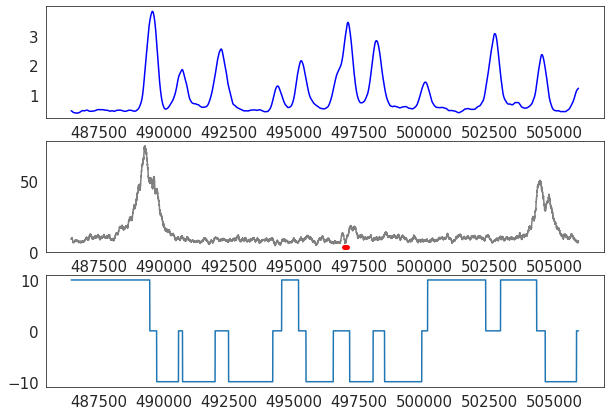

In [33]:
chrom = 'chrVII'
lpos = test[test.chr_x==chrom][0:1].start.values[0]+500
rpos = test[test.chr_x==chrom][1:].start.values[0]+3000

f, ax = plt.subplots(nrows=3,ncols=1, figsize = (10,7))
ax[0].plot(np.arange(lpos,rpos),chip_foldgly[chip_foldgly.chr==chrom][lpos:rpos].fold_nolog.values,'blue')
ax[1].plot(np.arange(lpos,rpos),Scc1_tension[Scc1_tension.chr==chrom][lpos:rpos].value.values,'grey')
ax[1].plot([CEN_df[CEN_df.chr==chrom].start.values[0],CEN_df[CEN_df.chr==chrom].end.values[0]],[3,3],color='red',linewidth=5)
ax[2].plot(np.arange(lpos,rpos),yeastgenome_gene_representation[chrom][0,lpos:rpos])

### Fig. 6 - supplemental figure 1F

In [34]:
#first section is with raff data
top5pct = enrichedRegions(chip_fold.fold_nolog,2.2)#500 chips

chip_diff = chip_fold.fold_nolog
out = []
regions = top5pct
m = np.mean(chip_diff)
s = np.std(chip_diff)
for i in range(len(regions)):
    z = regions[i]
    c = chip_diff.loc[z[0]-15000:z[1]+15000]
    c_diff = c[c>(m+1/3*s)] #this is mean + 1/3 std
    j = z[1]
    start = z[0]
    end = z[1]
    while j < z[1]+15000:
        try:
            c_diff[j+1]
            j +=1
        except:
            end = j
            j = z[1]+15000
    j = z[0]
    while j > z[0]-15000:
        try:
            c_diff[j-1]
            j -=1
        except:
            start = j
            j = z[0]-15000
    if start > end:
        print('problem!')
    out.append(tuple([start,end]))
print(len(out))
#merge GapR ChIPs
regions = sorted(list(set(out)))

out = []
i = 1
z = regions[0]
start = z[0]
end = z[1]
while i < len(regions):
    if regions[i][0] <= regions[i-1][1] + 150: #merge 150 bp
        end = regions[i][1]
        i += 1
    else:
        out.append([start,end])
        i += 1
        z = regions[i-1]
        start = z[0]
        end = z[1]
out.append([start,end])
print(len(out))
GapR_peaks = out

#check if any GapR_peaks are close to chr ends, exclude them
lengths = []
for i in la.items():
    lengths.append(i[1])
    
GapR_checked = []
for i in GapR_peaks:
    start = np.min(i)
    end = np.max(i)
    append = True
    if start - 1000 <= 0:
        append=False
    else:
        for j in lengths:
            if abs(start - j) <= 1000:
                append=False
            if abs(end - j) <= 1000:
                append=False
                print(i)
    if append == True:
        GapR_checked.append(i)        
        
GapR_checked = pd.DataFrame(GapR_checked)
GapR_checked.columns = ['start','end']
len(GapR_checked[GapR_checked.end-GapR_checked.start > 50])

593
511
[1041210, 1042449]
[1042700, 1044341]
[1357880, 1359064]
[1359513, 1360775]
[6577926, 6578748]
[10031233, 10032568]


502

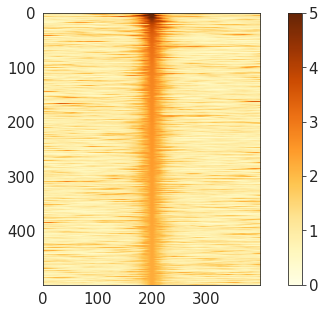

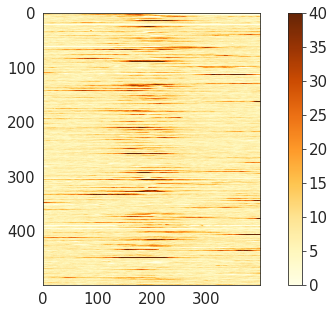

In [35]:
GapEnrich = []
GapEnrich2 = []
SccTEnrich = []
ind = []
N = 2000
for i, j in GapR_checked[:-1].iterrows():
    midpt = j.start+chip_fold[j.start:j.end].fold_nolog.argmax()
    GapEnrich.append(chip_fold[j.start:j.end].fold_nolog.max())
    GapEnrich2.append(chip_fold[midpt-N:midpt+N].fold_nolog.values)
    SccTEnrich.append(Scc1_tension[midpt-N:midpt+N].value.values)
    ind.append(i)

binSize = 10
out = []
out2 = []
for j in range(len(GapEnrich2)):
    a,b = [],[]
    for i in range(0,2*N,binSize):
        a.append(np.mean(GapEnrich2[j][i:i+binSize]))
        b.append(np.mean(SccTEnrich[j][i:i+binSize]))
    out.append(a)
    out2.append(b)
    
newMat = pd.DataFrame([GapEnrich,out,ind,out2],['avGapR','GapR_thrends','orig_ind','SccT']).transpose()
newMat.sort_values('avGapR',ascending=False,inplace=True)

sortedGapREnrich = []
sortedSccT = []
for i,j in newMat.iterrows():
    sortedGapREnrich.append(j.GapR_thrends)
    sortedSccT.append(j.SccT)
    
plt.figure(figsize = [10,5])
plt.imshow(sortedGapREnrich[0:500],vmin=0,vmax=5, cmap='YlOrBr')
plt.colorbar()

plt.figure(figsize = [10,5])
plt.imshow(sortedSccT[0:500], vmax = 40, cmap='YlOrBr')
plt.colorbar()

In [36]:
#aF data
top5pct = enrichedRegions(chip_foldaF.fold_nolog,4.6)#500 chips

chip_diff = chip_foldaF.fold_nolog
out = []
regions = top5pct
m = np.mean(chip_diff)
s = np.std(chip_diff)
for i in range(len(regions)):
    z = regions[i]
    c = chip_diff.loc[z[0]-15000:z[1]+15000]
    c_diff = c[c>(m+1/3*s)] #this is mean + 1/3 std
    j = z[1]
    start = z[0]
    end = z[1]
    while j < z[1]+15000:
        try:
            c_diff[j+1]
            j +=1
        except:
            end = j
            j = z[1]+15000
    j = z[0]
    while j > z[0]-15000:
        try:
            c_diff[j-1]
            j -=1
        except:
            start = j
            j = z[0]-15000
    if start > end:
        print('problem!')
    out.append(tuple([start,end]))
print(len(out))
#merge GapR ChIPs
regions = sorted(list(set(out)))

out = []
i = 1
z = regions[0]
start = z[0]
end = z[1]
while i < len(regions):
    if regions[i][0] <= regions[i-1][1] + 150: 
        end = regions[i][1]
        i += 1
    else:
        out.append([start,end])
        i += 1
        z = regions[i-1]
        start = z[0]
        end = z[1]
out.append([start,end])
print(len(out))
GapR_peaks = out

#check if any GapR_peaks are close to chr ends, exclude them
lengths = []
for i in la.items():
    lengths.append(i[1])
    
GapR_checked = []
for i in GapR_peaks:
    start = np.min(i)
    end = np.max(i)
    append = True
    if start - 1000 <= 0:
        append=False
    else:
        for j in lengths:
            if abs(start - j) <= 1000:
                append=False
            if abs(end - j) <= 1000:
                append=False
                print(i)
    if append == True:
        GapR_checked.append(i)        
        
GapR_checked = pd.DataFrame(GapR_checked)
GapR_checked.columns = ['start','end']
len(GapR_checked[GapR_checked.end-GapR_checked.start > 50])

571
522
[229991, 230924]
[1042398, 1043985]
[2891313, 2892663]
[3468034, 3468959]
[3738422, 3739945]
[4829161, 4830727]
[5391520, 5393415]
[5831595, 5833349]
[6577170, 6579012]
[7243936, 7245898]
[8322495, 8324000]
[9246421, 9248459]
[11122402, 11123995]


509

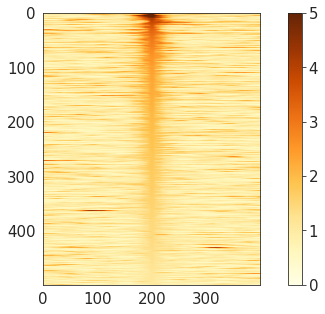

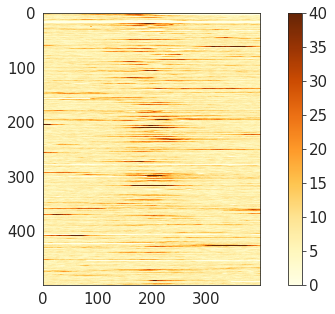

In [37]:
GapEnrich = []
GapEnrich2 = []
SccTEnrich = []
ind = []
N = 2000
for i, j in GapR_checked[:-1].iterrows():
    midpt = j.start+chip_fold[j.start:j.end].fold_nolog.argmax()
    GapEnrich.append(chip_fold[j.start:j.end].fold_nolog.max())
    GapEnrich2.append(chip_fold[midpt-N:midpt+N].fold_nolog.values)
    SccTEnrich.append(Scc1_tension[midpt-N:midpt+N].value.values)
    ind.append(i)

binSize = 10
out = []
out2 = []
for j in range(len(GapEnrich2)):
    a,b = [],[]
    for i in range(0,2*N,binSize):
        a.append(np.mean(GapEnrich2[j][i:i+binSize]))
        b.append(np.mean(SccTEnrich[j][i:i+binSize]))
    out.append(a)
    out2.append(b)
    
newMat = pd.DataFrame([GapEnrich,out,ind,out2],['avGapR','GapR_thrends','orig_ind','SccT']).transpose()
newMat.sort_values('avGapR',ascending=False,inplace=True)

sortedGapREnrich = []
sortedSccT = []
for i,j in newMat.iterrows():
    sortedGapREnrich.append(j.GapR_thrends)
    sortedSccT.append(j.SccT)
    
plt.figure(figsize = [10,5])
plt.imshow(sortedGapREnrich[0:500],vmin=0,vmax=5, cmap='YlOrBr')
plt.colorbar()

plt.figure(figsize = [10,5])
plt.imshow(sortedSccT[0:500], vmax = 40, cmap='YlOrBr')
plt.colorbar()

In [38]:
#glycerol data
top5pct = enrichedRegions(chip_foldgly.fold_nolog,3.8)#500 chips

chip_diff = chip_fold.fold_nolog
out = []
regions = top5pct
m = np.mean(chip_diff)
s = np.std(chip_diff)
for i in range(len(regions)):
    z = regions[i]
    c = chip_diff.loc[z[0]-15000:z[1]+15000]
    c_diff = c[c>(m+1/3*s)] #this is mean + 1/3 std
    j = z[1]
    start = z[0]
    end = z[1]
    while j < z[1]+15000:
        try:
            c_diff[j+1]
            j +=1
        except:
            end = j
            j = z[1]+15000
    j = z[0]
    while j > z[0]-15000:
        try:
            c_diff[j-1]
            j -=1
        except:
            start = j
            j = z[0]-15000
    if start > end:
        print('problem!')
    out.append(tuple([start,end]))
print(len(out))
#merge GapR ChIPs
regions = sorted(list(set(out)))

out = []
i = 1
z = regions[0]
start = z[0]
end = z[1]
while i < len(regions):
    if regions[i][0] <= regions[i-1][1] + 150: 
        end = regions[i][1]
        i += 1
    else:
        out.append([start,end])
        i += 1
        z = regions[i-1]
        start = z[0]
        end = z[1]
out.append([start,end])
print(len(out))
GapR_peaks = out

#check if any GapR_peaks are close to chr ends, exclude them
lengths = []
for i in la.items():
    lengths.append(i[1])
    
GapR_checked = []
for i in GapR_peaks:
    start = np.min(i)
    end = np.max(i)
    append = True
    if start - 1000 <= 0:
        append=False
    else:
        for j in lengths:
            if abs(start - j) <= 1000:
                append=False
            if abs(end - j) <= 1000:
                append=False
                print(i)
    if append == True:
        GapR_checked.append(i)        
        
GapR_checked = pd.DataFrame(GapR_checked)
GapR_checked.columns = ['start','end']
len(GapR_checked[GapR_checked.end-GapR_checked.start > 50])

547
541
[1357880, 1359064]
[3463758, 3468939]


534

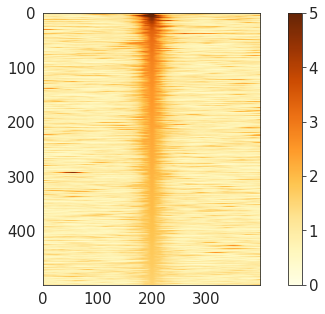

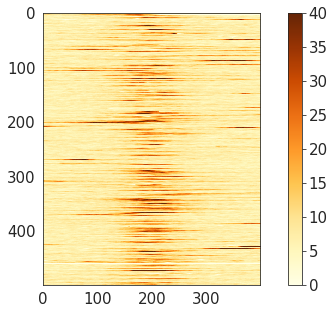

In [39]:
GapEnrich = []
GapEnrich2 = []
SccTEnrich = []
ind = []
N = 2000
for i, j in GapR_checked[:-1].iterrows():
    midpt = j.start+chip_fold[j.start:j.end].fold_nolog.argmax()
    GapEnrich.append(chip_fold[j.start:j.end].fold_nolog.max())
    GapEnrich2.append(chip_fold[midpt-N:midpt+N].fold_nolog.values)
    SccTEnrich.append(Scc1_tension[midpt-N:midpt+N].value.values)
    ind.append(i)

binSize = 10
out = []
out2 = []
for j in range(len(GapEnrich2)):
    a,b = [],[]
    for i in range(0,2*N,binSize):
        a.append(np.mean(GapEnrich2[j][i:i+binSize]))
        b.append(np.mean(SccTEnrich[j][i:i+binSize]))
    out.append(a)
    out2.append(b)
    
newMat = pd.DataFrame([GapEnrich,out,ind,out2],['avGapR','GapR_thrends','orig_ind','SccT']).transpose()
newMat.sort_values('avGapR',ascending=False,inplace=True)

sortedGapREnrich = []
sortedSccT = []
for i,j in newMat.iterrows():
    sortedGapREnrich.append(j.GapR_thrends)
    sortedSccT.append(j.SccT)
    
plt.figure(figsize = [10,5])
plt.imshow(sortedGapREnrich[0:500],vmin=0,vmax=5, cmap='YlOrBr')
plt.colorbar()

plt.figure(figsize = [10,5])
plt.imshow(sortedSccT[0:500], vmax = 40, cmap='YlOrBr')
plt.colorbar()